# v1.6.1 20250520
ベンチマークデータでの検証結果

In [1]:
VER='1.6.1o'

DR=f"data/data.{VER}"

In [2]:
items = []
status=[]
with open(f"{DR}/output.txt",'r',encoding='utf-8') as f:
    for i,l in enumerate(f):
        if i == 0:
            continue
        items.append(l.rstrip().split(","))
        status.append(int(items[-1][5]))
        if status[-1]<50:
            items.pop()
            status.pop()
len(items)
okitems=items

In [3]:
tp=0
fp=0
meken_other=0
for item in items:
    meken_flg = item[3]
    if meken_flg == "1":
        tp+=1
    elif meken_flg=="2":
        fp+=1
    else:
        meken_other+=1

print(f"tp={tp}")
print(f"fp={fp}")
print(f"meken_other={meken_other}")



tp=61883
fp=226
meken_other=286


In [4]:
items = []
with open(f"{DR}/output.txt",'r',encoding='utf-8') as f:
    for i,l in enumerate(f):
        if i==0:
            continue
        items.append(l.rstrip().split(","))
        status.append(int(items[-1][5]))
        if status[-1]>=50:
            status.pop()
            items.pop()
len(items)
ngitems=items

In [5]:
tn=0
fn=0
meken_other=0
for item in items:
    meken_flg = item[3]
    if meken_flg == "2":
        tn+=1
    elif meken_flg=="1":
        fn+=1
    else:
        meken_other+=1

print(f"tn={tn}")
print(f"fn={fn}")
print(f"meken_other={meken_other}")

tn=116046
fn=9670
meken_other=452


In [6]:
acc = (tp+tn)/(tp+tn+fp+fn)
print(f"acc={acc}")

acc=0.9473126580593638


In [7]:
precision=tp/(tp+fp)
recall=tp/(tp+fn)
print(f"precision={precision}")
print(f"recall={recall}")

precision=0.9963612358917388
recall=0.8648554218551283


In [8]:
fmeasure=2*(precision*recall)/(precision+recall)
print(f"fmeasure={fmeasure}")

fmeasure=0.9259625024315065


In [9]:
import matplotlib.pyplot as plt

(array([119718.,      0.,      0.,   6450.,      0.,      0.,      0.,
             0.,      0.,  62395.]),
 array([ 0.,  9., 18., 27., 36., 45., 54., 63., 72., 81., 90.]),
 <BarContainer object of 10 artists>)

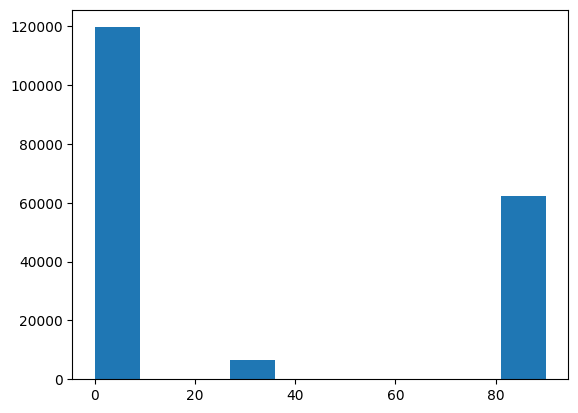

In [10]:
plt.hist(status)

In [11]:
# 計算時間
import datetime

okst=datetime.datetime.strptime(okitems[0][-1],'%Y-%m-%d %H:%M:%S.%f %z').timestamp()*1000
oked=datetime.datetime.strptime(okitems[-1][-1],'%Y-%m-%d %H:%M:%S.%f %z').timestamp()*1000
ngst=datetime.datetime.strptime(ngitems[0][-1],'%Y-%m-%d %H:%M:%S.%f %z').timestamp()*1000
nged=datetime.datetime.strptime(ngitems[-1][-1],'%Y-%m-%d %H:%M:%S.%f %z').timestamp()*1000

lst=[okst,oked,ngst,nged]
print(max(lst)-min(lst))

print((max(lst)-min(lst))/(len(okitems)+len(ngitems)))


74923533.0
397.3395257818342


In [12]:
# 詳細時間測定
import datetime

oktime=[]

for item in okitems:
    st=datetime.datetime.strptime(item[-2],'%Y-%m-%d %H:%M:%S.%f %z')
    ed=datetime.datetime.strptime(item[-1],'%Y-%m-%d %H:%M:%S.%f %z')
    stepoch=st.timestamp()*1000
    edepoch=ed.timestamp()*1000
    oktime.append(edepoch-stepoch)
    

(array([6.2087e+04, 1.5200e+02, 7.4000e+01, 4.2000e+01, 2.4000e+01,
        7.0000e+00, 1.0000e+00, 1.0000e+00, 4.0000e+00, 3.0000e+00]),
 array([    0. ,  1190.5,  2381. ,  3571.5,  4762. ,  5952.5,  7143. ,
         8333.5,  9524. , 10714.5, 11905. ]),
 <BarContainer object of 10 artists>)

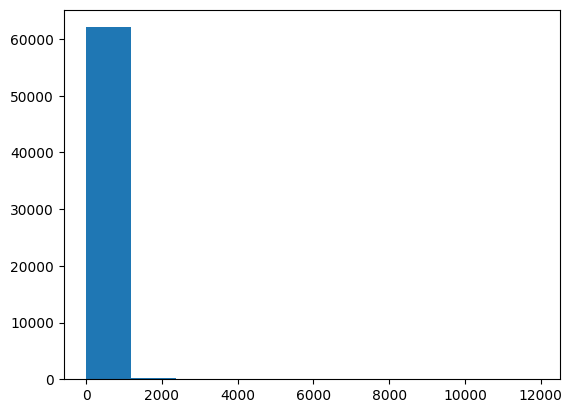

In [13]:
plt.hist(oktime)

In [14]:
import statistics

print(max(oktime))
print(min(oktime))
print(statistics.mean(oktime))

11905.0
0.0
18.72533055533296


In [15]:
import datetime

ngtime=[]

for item in ngitems:
    st=datetime.datetime.strptime(item[-2],'%Y-%m-%d %H:%M:%S.%f %z')
    ed=datetime.datetime.strptime(item[-1],'%Y-%m-%d %H:%M:%S.%f %z')
    stepoch=st.timestamp()*1000
    edepoch=ed.timestamp()*1000
    ngtime.append(edepoch-stepoch)

(array([1.18892e+05, 4.77800e+03, 1.83100e+03, 4.04000e+02, 1.46000e+02,
        9.30000e+01, 1.30000e+01, 6.00000e+00, 3.00000e+00, 2.00000e+00]),
 array([    0. ,  2260.7,  4521.4,  6782.1,  9042.8, 11303.5, 13564.2,
        15824.9, 18085.6, 20346.3, 22607. ]),
 <BarContainer object of 10 artists>)

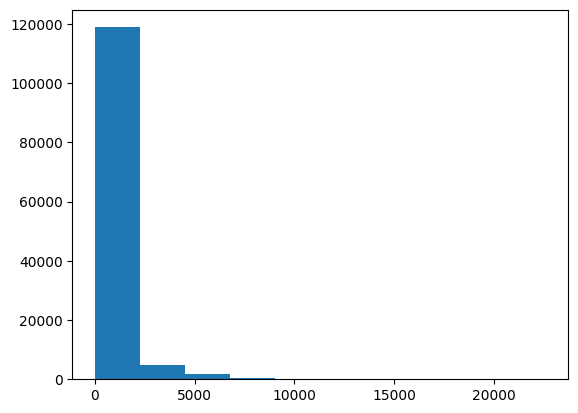

In [16]:
plt.hist(ngtime)

In [17]:
import statistics

print(max(ngtime))
print(min(ngtime))
print(statistics.mean(ngtime))

22607.0
0.0
584.545193709974


In [18]:
#### 簡易モデル

In [19]:
# 簡易モデル，　簡易モデルはアンサンブルをやらないので，９０がOKで，それ以外がNGになる

In [20]:
s_okitems = []
s_okstatus=[]
with open(f"{DR}/output_simple.txt",'r',encoding='utf-8') as f:
    for i,l in enumerate(f):
        if i == 0:
            continue
        s_okitems.append(l.rstrip().split(","))
        s_okstatus.append(int(s_okitems[-1][5]))
        if s_okstatus[-1]<50:
            s_okitems.pop()
            s_okstatus.pop()
len(s_okitems)

62418

In [21]:
s_tp=0
s_fp=0
s_tn=0
s_fn=0

meken_other=0
for item in s_okitems:
    meken_flg = item[3]
    if item[5] == "90":
        
        if meken_flg == "1":
            s_tp+=1
        elif meken_flg=="2":
            s_fp+=1
        else:
            meken_other+=1
    else:
        if meken_flg == "2":
            s_tn+=1
        elif meken_flg=="1":
            s_fn+=1
        else:
            meken_other+=1


In [22]:
s_ngitems = []
s_ngstatus=[]
with open(f"{DR}/output_simple.txt",'r',encoding='utf-8') as f:
    for i,l in enumerate(f):
        if i == 0:
            continue
        s_ngitems.append(l.rstrip().split(","))
        s_ngstatus.append(int(s_ngitems[-1][5]))
        if s_ngstatus[-1]>=50:
            s_ngstatus.pop()
            s_ngitems.pop()
len(s_ngitems)

126145

In [23]:
for item in s_ngitems:
    meken_flg = item[3]
    if meken_flg == "2":
        s_tn+=1
    elif meken_flg=="1":
        s_fn+=1
    else:
        meken_other+=1

print(f"s_tp={s_tp}")
print(f"s_fp={s_fp}")
print(f"s_tn={s_tn}")
print(f"s_fn={s_fn}")
print(f"meken_other={meken_other}")

s_tp=61906
s_fp=226
s_tn=116046
s_fn=9647
meken_other=738


In [24]:
s_acc = (s_tp+s_tn)/(s_tp+s_tn+s_fp+s_fn)
print(f"s_acc={s_acc}")

s_acc=0.9474351124717157


In [25]:
s_precision=s_tp/(s_tp+s_fp)
s_recall=s_tp/(s_tp+s_fn)
print(f"s_precision={s_precision}")
print(f"s_recall={s_recall}")

s_precision=0.9963625828880448
s_recall=0.8651768619065587


In [26]:
s_fmeasure=2*(s_precision*s_recall)/(s_precision+s_recall)
print(f"s_fmeasure={s_fmeasure}")

s_fmeasure=0.9261472865317725


In [27]:
# 計算時間
import datetime

okst=datetime.datetime.strptime(s_okitems[0][-1],'%Y-%m-%d %H:%M:%S.%f %z').timestamp()*1000
oked=datetime.datetime.strptime(s_okitems[-1][-1],'%Y-%m-%d %H:%M:%S.%f %z').timestamp()*1000
ngst=datetime.datetime.strptime(s_ngitems[0][-1],'%Y-%m-%d %H:%M:%S.%f %z').timestamp()*1000
nged=datetime.datetime.strptime(s_ngitems[-1][-1],'%Y-%m-%d %H:%M:%S.%f %z').timestamp()*1000

lst=[okst,oked,ngst,nged]
print(max(lst)-min(lst))

print((max(lst)-min(lst))/(len(s_okitems)+len(s_ngitems)))

349404.0
1.852982822717076


In [28]:
# 詳細時間測定
import datetime

s_oktime=[]

for item in s_okitems:
    st=datetime.datetime.strptime(item[-2],'%Y-%m-%d %H:%M:%S.%f %z')
    ed=datetime.datetime.strptime(item[-1],'%Y-%m-%d %H:%M:%S.%f %z')
    stepoch=st.timestamp()*1000
    edepoch=ed.timestamp()*1000
    s_oktime.append(edepoch-stepoch)
    

In [29]:
import statistics

print(max(s_oktime))
print(min(s_oktime))
print(statistics.mean(s_oktime))

80.0
0.0
1.426655772373354


In [30]:
import datetime

s_ngtime=[]

for item in s_ngitems:
    st=datetime.datetime.strptime(item[-2],'%Y-%m-%d %H:%M:%S.%f %z')
    ed=datetime.datetime.strptime(item[-1],'%Y-%m-%d %H:%M:%S.%f %z')
    stepoch=st.timestamp()*1000
    edepoch=ed.timestamp()*1000
    s_ngtime.append(edepoch-stepoch)

In [31]:
import statistics

print(max(s_ngtime))
print(min(s_ngtime))
print(statistics.mean(s_ngtime))

741.0
0.0
2.0190812160608824


In [32]:
# 外国人とそれ以外に分て正解率をみる 20241106
# アルファベットのみは外国人とする

In [33]:

def calc_acc(ok_items,ng_items):
    tp=0
    fp=0
    meken_other=0
    for item in ok_items:
        meken_flg = item[3]
        if meken_flg == "1":
            tp+=1
        elif meken_flg=="2":
            fp+=1
        else:
            meken_other+=1
    tn=0
    fn=0
    for item in ng_items:
        meken_flg = item[3]
        if meken_flg == "2":
            tn+=1
        elif meken_flg=="1":
            fn+=1
        else:
            meken_other+=1

    print(f"tp={tp}")
    print(f"fp={fp}")
    print(f"tn={tn}")
    print(f"fn={fn}")
    n= tp+tn+fp+fn
    print(f'n={n}')
    print(f"meken_other={meken_other}")
    acc = (tp+tn)/(tp+tn+fp+fn)
    print(f"acc={acc}")
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    print(f"precision={precision}")
    print(f"recall={recall}")
    fmeasure=2*(precision*recall)/(precision+recall)
    print(f"fmeasure={fmeasure}")
    return tp+tn+fp+fn


In [34]:
import re

def calc_okng(items):
    f_ok=[]
    j_ok=[]

    for item in items:
        if re.match(r'^[Ａ-Ｚａ-ｚ０-９a-zA-z　＿]+$',item[1]) is None:
            j_ok.append(item)
        else:
            f_ok.append(item)
    return f_ok, j_ok

In [35]:
f_okitems,j_okitems=calc_okng(okitems)
f_ngitems,j_ngitems=calc_okng(ngitems)

f_num=calc_acc(f_okitems,f_ngitems)

tp=2757
fp=29
tn=8745
fn=2476
n=14007
meken_other=140
acc=0.8211608481473549
precision=0.9895908111988514
recall=0.5268488438754061
fmeasure=0.687616909839132


In [36]:
j_num=calc_acc(j_okitems,j_ngitems)

tp=59126
fp=197
tn=107301
fn=7194
n=173818
meken_other=598
acc=0.9574785120068118
precision=0.9966791969387927
recall=0.8915259348612786
fmeasure=0.9411745978685641


In [37]:
f_num/(j_num+f_num)

0.07457473712232131

In [38]:
### 簡易モデル

In [39]:
f_s_okitems,j_s_okitems=calc_okng(s_okitems)
f_s_ngitems,j_s_ngitems=calc_okng(s_ngitems)

f_s_num=calc_acc(f_s_okitems,f_s_ngitems)

tp=2757
fp=29
tn=8745
fn=2476
n=14007
meken_other=140
acc=0.8211608481473549
precision=0.9895908111988514
recall=0.5268488438754061
fmeasure=0.687616909839132


In [40]:
j_s_num=calc_acc(j_s_okitems,j_s_ngitems)

tp=59149
fp=197
tn=107301
fn=7171
n=173818
meken_other=598
acc=0.9576108343209564
precision=0.9966804839416304
recall=0.8918727382388419
fmeasure=0.941368389222224


In [41]:
f_s_num/(j_s_num+f_s_num)

0.07457473712232131

In [42]:
s=j_okitems[3][6]
a=s.split('[')

In [43]:
#b=a[1].split('><')

#b[0].find('false')

In [44]:
# 簡易モデル、詳細モデル（D庁姓名辞書、D庁統計辞書、AI）のそれぞれの正解率をだす。 20241107

In [45]:
def each_acc(items):
    # ok count
    simple=0
    dict=0
    stat=0
    ai=0

    score={}
    for item in items:
        if item[5] not in score:
            score[item[5]]=0
        score[item[5]]+=1
        reason=item[6]
        sd = reason.split('[')
        if len(sd)==1:
            # only simple 
            simple+=1
        else:
            di=sd[1].split('><')
            if di[0].find('false') <0:
                dict+=1
            if di[1].find('false') <0:
                stat+=1
            if di[2].find('false') <0:
                ai+=1
    return simple,dict,stat,ai,score


In [46]:
f_ok_simple,f_ok_dict,f_ok_stat,f_ok_ai ,f_ok_score= each_acc(f_okitems)

print(f'f_ok_simple={f_ok_simple},f_ok_dict={f_ok_dict},f_ok_stat={f_ok_stat},f_ok_ai={f_ok_ai},f_ok_score={f_ok_score}')

f_ok_simple=2828,f_ok_dict=0,f_ok_stat=0,f_ok_ai=0,f_ok_score={'90': 2828}


In [47]:
f_ng_simple,f_ng_dict,f_ng_stat,f_ng_ai,f_ng_score = each_acc(f_ngitems)

print(f'f_ng_simple={f_ng_simple},f_ng_dict={f_ng_dict},f_ng_stat={f_ng_stat},f_ng_ai={f_ng_ai},f_ng_score={f_ng_score}')

IndexError: list index out of range

In [ ]:
j_ok_simple,j_ok_dict,j_ok_stat,j_ok_ai ,j_ok_score= each_acc(j_okitems)

print(f'j_ok_simple={j_ok_simple},j_ok_dict={j_ok_dict},j_ok_stat={j_ok_stat},j_ok_ai={j_ok_ai},j_ok_score={j_ok_score}')

j_ok_simple=68268,j_ok_dict=212,j_ok_stat=218,j_ok_ai=172,j_ok_score={'90': 68268, '80': 46, '70': 232}


In [ ]:
j_ng_simple,j_ng_dict,j_ng_stat,j_ng_ai ,j_ng_score= each_acc(j_ngitems)

print(f'j_ng_simple={j_ng_simple},j_ng_dict={j_ng_dict},j_ng_stat={j_ng_stat},j_ng_ai={j_ng_ai},j_ng_score={j_ng_score}')

j_ng_simple=0,j_ng_dict=93,j_ng_stat=760,j_ng_ai=111,j_ng_score={'0': 104907, '30': 964}


In [ ]:
# 各ストラテジーごとの正解率

In [ ]:
def calc_each_model_tp(items):
    fn,tp,tn,fp=0,0,0,0
    for vals in items:
        meken_flg=int(vals[3])
        pred_flg=int(vals[5])

        if meken_flg==1:
            if pred_flg==0:
                fn+=1
            elif pred_flg>0:
                tp+=1
        elif meken_flg==2:
            if pred_flg ==0:
                tn+=1
            elif pred_flg>0:
                fp+=1

    acc = (tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    fmeasure=2*(precision*recall)/(precision+recall)
    n= tp+tn+fp+fn
    print(f'n={n}')
    print(f'acc={acc}')
    print(f'precision={precision}')
    print(f'recall={recall}')
    print(f'fmeasure={fmeasure}')
    return fn,tp,tn,fp,acc,precision,recall,fmeasure

In [ ]:
def calc_each_model(fname):
    items=[]
    with open(fname,'r',encoding='utf-8') as f:
        for i,l in enumerate(f):
            if i == 0:
                continue
            items.append(l.rstrip().split(","))
            status.append(int(items[-1][5]))
            

    f_items,j_items=calc_okng(items)

    print('f_items')
    calc_each_model_tp(f_items)

    print('j_items')
    calc_each_model_tp(j_items)

    print('all_items')
    calc_each_model_tp(j_items+f_items)




In [ ]:
# dict

In [ ]:
calc_each_model(DR+"/output_only_dict.txt")

f_items
n=14007
acc=0.913471835510816
precision=0.9769869513641756
recall=0.786929103764571
fmeasure=0.8717188823031331
j_items
n=173819
acc=0.9668850931141014
precision=0.9426036627252664
recall=0.972422008112061
fmeasure=0.9572806887338579
all_items
n=187826
acc=0.9629018346767753
precision=0.9445989481510036
recall=0.9588562484277608
fmeasure=0.9516742031236997


In [ ]:
# stat

In [ ]:
calc_each_model(DR+"/output_only_stat.txt",)

f_items
n=14007
acc=0.7631898336546012
precision=0.9984391259105099
recall=0.3667112554939805
fmeasure=0.536408106219427
j_items
n=173819
acc=0.9746057680690834
precision=0.9881870514943616
recall=0.9447384689615658
fmeasure=0.9659744384317717
all_items
n=187826
acc=0.9588395642775761
precision=0.9884886800251045
recall=0.9024652709841519
fmeasure=0.9435202840423434


In [ ]:
# ai

In [ ]:
calc_each_model(DR+"/output_only_ai.txt",)

f_items
n=14007
acc=0.661383593917327
precision=1.0
recall=0.09363653735906746
fmeasure=0.17123886073737551
j_items
n=173819
acc=0.9524390314062329
precision=0.9964935686918446
recall=0.8784397098958098
fmeasure=0.9337500500861483
all_items
n=187826
acc=0.9307337642285946
precision=0.9965227126234013
recall=0.821044246303491
fmeasure=0.9003126245134399


In [ ]:
# 実データの調査、

In [ ]:
f_okitems,j_okitems=calc_okng(okitems)
f_ngitems,j_ngitems=calc_okng(ngitems)
f_items = f_okitems+f_ngitems
j_items = j_okitems+j_ngitems



In [ ]:
def calc_okng_num(items):
    ok=0
    ng=0
    for item in items:
        if int(item[3])==1: # meken ok
            ok+=1
        elif int(item[3])==2:
            ng+=1
    return ok,ng

In [ ]:
j_ok,j_ng=calc_okng_num(j_items)
print(f'j_ok={j_ok},j_ng={j_ng}')

j_ok=66321,j_ng=107498


In [ ]:
f_ok,f_ng=calc_okng_num(f_items)
print(f'f_ok={f_ok},f_ng={f_ng}')

f_ok=5233,f_ng=8774


In [ ]:
!date

2025年  6月 11日 水曜日 09:00:17 JST
